# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

temp_units = "imperial"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        city_loop = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(city_loop['clouds']['all'])
        countries.append(city_loop['sys']['country'])
        dates.append(city_loop['dt'])
        humidities.append(city_loop['main']['humidity'])
        lats.append(city_loop['coord']['lat'])
        lngs.append(city_loop['coord']['lon'])
        max_temps.append(city_loop['main']['temp_max'])
        wind_speeds.append(city_loop['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping")
print("------------------------------\nData Retrieval Complete\n------------------------------") 

Processing Record 1 of Set 1 | pevek
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | klaksvik
Processing Record 4 of Set 1 | faanui
Processing Record 5 of Set 1 | atuona
City not found. Skipping
City not found. Skipping
Processing Record 6 of Set 1 | kodiak
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | ushuaia
City not found. Skipping
Processing Record 9 of Set 1 | dikson
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | turukhansk
City not found. Skipping
City not found. Skipping
Processing Record 14 of Set 1 | halifax
Processing Record 15 of Set 1 | karratha
Processing Record 16 of Set 1 | vaini
City not found. Skipping
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | yar-sale
Processing Record 20 of Set 1 | coxim
Processing Record 21 of Set 1 | ribeira grande

Processing Record 38 of Set 4 | roscommon
City not found. Skipping
Processing Record 39 of Set 4 | digha
Processing Record 40 of Set 4 | ashland
Processing Record 41 of Set 4 | saryozek
City not found. Skipping
Processing Record 42 of Set 4 | gualeguay
Processing Record 43 of Set 4 | sinop
Processing Record 44 of Set 4 | xinzhi
Processing Record 45 of Set 4 | zhongshu
Processing Record 46 of Set 4 | burgeo
Processing Record 47 of Set 4 | agirish
Processing Record 48 of Set 4 | ramos arizpe
Processing Record 49 of Set 4 | palu
Processing Record 1 of Set 5 | ayorou
Processing Record 2 of Set 5 | lodja
Processing Record 3 of Set 5 | takhli
Processing Record 4 of Set 5 | mecca
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | locri
Processing Record 8 of Set 5 | neustadt
City not found. Skipping
Processing Record 9 of Set 5 | souillac
Processing Record 10 of Set 5 | camalu
Processing Record 11 of Set 5 | saint-joseph
Processin

Processing Record 31 of Set 8 | port lavaca
Processing Record 32 of Set 8 | isangel
Processing Record 33 of Set 8 | wau
Processing Record 34 of Set 8 | mont-dore
Processing Record 35 of Set 8 | tevaitoa
Processing Record 36 of Set 8 | baena
Processing Record 37 of Set 8 | sibolga
Processing Record 38 of Set 8 | oranjemund
Processing Record 39 of Set 8 | dentsville
Processing Record 40 of Set 8 | pedernales
Processing Record 41 of Set 8 | armizonskoye
Processing Record 42 of Set 8 | garissa
Processing Record 43 of Set 8 | brigantine
Processing Record 44 of Set 8 | san carlos
Processing Record 45 of Set 8 | guangyuan
Processing Record 46 of Set 8 | honiara
Processing Record 47 of Set 8 | mabaruma
Processing Record 48 of Set 8 | murray bridge
Processing Record 49 of Set 8 | buala
Processing Record 1 of Set 9 | noumea
Processing Record 2 of Set 9 | matamoros
Processing Record 3 of Set 9 | namibe
Processing Record 4 of Set 9 | dong hoi
Processing Record 5 of Set 9 | mitu
Processing Record 6

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create a dictionary to establish a dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}


In [5]:
# Create the dataframe
weather_dataframe = pd.DataFrame(weather_dict)

In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,pevek,92,RU,1650845297,91,69.7008,170.3133,12.22,1.99
1,mataura,91,NZ,1650845228,81,-46.1927,168.8643,52.48,10.33
2,klaksvik,100,FO,1650845296,82,62.2266,-6.5890,40.12,15.99
3,faanui,34,PF,1650845297,71,-16.4833,-151.7500,81.39,6.60
4,atuona,13,PF,1650845239,73,-9.8000,-139.0333,79.38,18.01


In [7]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [8]:
# make sure there are no holes in the data
weather_dataframe.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [9]:
# Another way to take a look at the data as a whole
weather_dataframe.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,553.000000,5.530000e+02,553.000000,553.000000,553.000000,553.000000,553.000000
mean,62.622061,1.650845e+09,72.350814,22.266577,22.262078,60.794539,7.421881
std,36.560849,7.829256e+01,22.895317,31.729571,87.423189,20.406042,5.343312
min,0.000000,1.650845e+09,1.000000,-54.800000,-179.166700,-2.020000,0.000000
25%,29.000000,1.650845e+09,63.000000,-3.137400,-51.100000,46.360000,3.400000
50%,75.000000,1.650845e+09,78.000000,26.184200,23.433300,65.930000,5.970000
75%,98.000000,1.650845e+09,90.000000,47.733300,97.200000,78.080000,10.360000
max,100.000000,1.650845e+09,100.000000,78.218600,179.316700,95.110000,31.070000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# nothing over >100% humidity 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

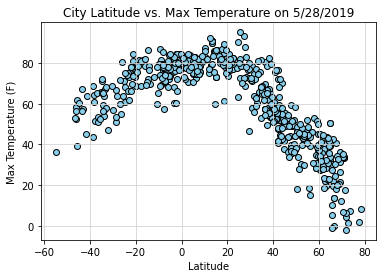

In [11]:
# Latitude vs Temperature Plot
# how the scatter plot looks
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
# title
plt.title("City Latitude vs. Max Temperature on 5/28/2019")
# x-axis
plt.xlabel("Latitude")
# y-axis
plt.ylabel("Max Temperature (F)")
# how the grid looks
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

#save as a png to the figures folder
plt.savefig("./figures/lat_vs_temp.png", bbox_inches='tight')
plt.show()

## Latitude vs. Humidity Plot

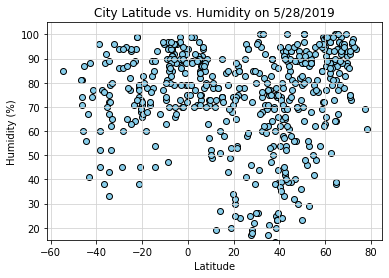

In [12]:
# Latitude vs Humidity Plot
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity on 5/28/2019")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


plt.savefig("./figures/lat_vs_humidity.png", bbox_inches='tight')
plt.show()

## Latitude vs. Cloudiness Plot

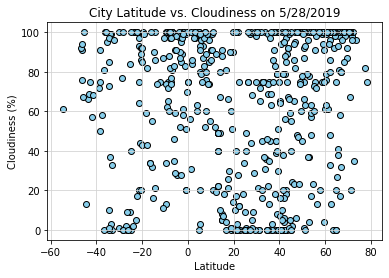

In [13]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness on 5/28/2019")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


plt.savefig("./figures/lat_vs_cloud.png", bbox_inches='tight')
plt.show()

## Latitude vs. Wind Speed Plot

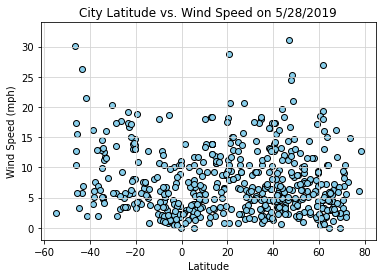

In [14]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed on 5/28/2019")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


plt.savefig("./figures/lat_vs_wind_speed.png", bbox_inches='tight')
plt.show()

## Linear Regression

In [15]:
# Create a function to create Linear Regression plots

# x_values: first variable
# y_values: second variable
# regEQplotX: control the location where the linear regression equation appears on the plot x line
# regEQplotY: control the location where the linear regression equation appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-square is {rvalue}")
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(f"{y_label}")
    plt.grid()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
# pull loc above and below the equator; cities directly on the equator are excluded
Northern_DF = weather_dataframe.loc[weather_dataframe['Lat'] > 0]
Southern_DF = weather_dataframe.loc[weather_dataframe['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is -0.8912462152437213
y = -0.98x + 94.59


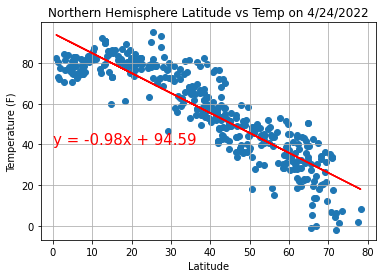

In [17]:
#set the data sets to compare
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Max Temp"]
#move the equations to where it can be seen
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#title
plt.title(f"Northern Hemisphere Latitude vs Temp on 4/24/2022")
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)

#save as a png to the figures folder
# NHL=Northern Hemisphere Latitiude
plt.savefig("./figures/NHL_vs_temp.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.7106775174548288
y = 0.53x + 80.49


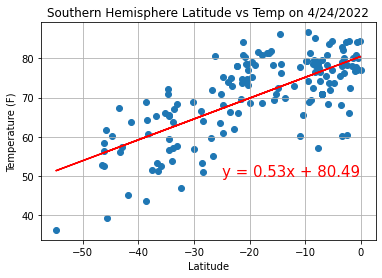

In [18]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Max Temp"]
regEQplotX = -25
regEQplotY = 50
y_label = "Temperature (F)"
plt.title(f"Southern Hemisphere Latitude vs Temp on 4/24/2022")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


# SHL= Southern Hemishere Latitude
plt.savefig("./figures/SHL_vs_temp.png", bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.27789500678926526
y = 0.35x + 56.56


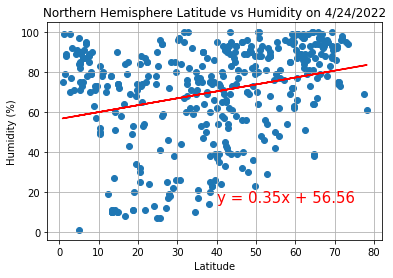

In [19]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Humidity"]
regEQplotX = 40
regEQplotY = 15
y_label = "Humidity (%)"
plt.title(f"Northern Hemisphere Latitude vs Humidity on 4/24/2022")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/NH_humidity_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is 0.3735192833652362
y = 0.4x + 86.07


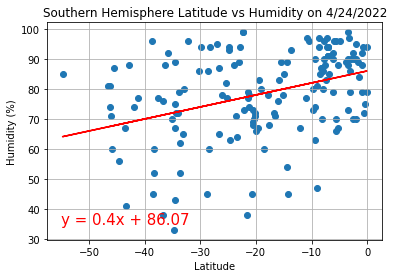

In [20]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Humidity"]
regEQplotX = -55
regEQplotY = 35
y_label = "Humidity (%)"
plt.title(f"Southern Hemisphere Latitude vs Humidity on 4/24/2022")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/SH_humidity_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.18362244511060533
y = 0.34x + 47.41


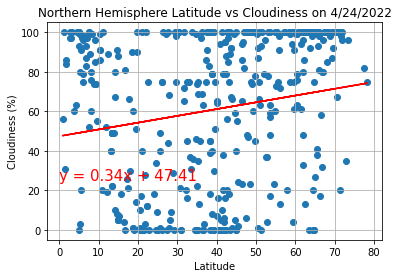

In [21]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f"Northern Hemisphere Latitude vs Cloudiness on 4/24/2022")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/NH_cloudiness_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.19592390230559395
y = 0.48x + 76.66


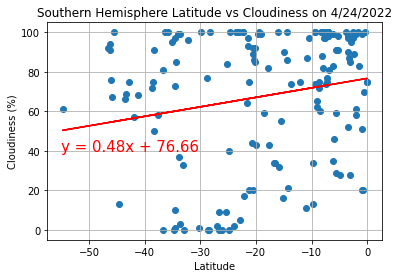

In [22]:
x_values = Southern_DF["Lat"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 40
y_label = "Cloudiness (%)"
plt.title(f"Southern Hemisphere Latitude vs Cloudiness on 4/24/2022")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/SH_cloudiness_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.04943236485175781
y = -0.01x + 7.89


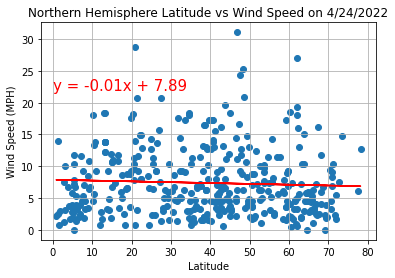

In [23]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Wind Speed"]
regEQplotX = 0
regEQplotY = 22
y_label = "Wind Speed (MPH)"
plt.title(f"Northern Hemisphere Latitude vs Wind Speed on 4/24/2022")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/NH_WindSpeed_vs_lat_regress.png", bbox_inches='tight')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.04943236485175781
y = -0.01x + 7.89


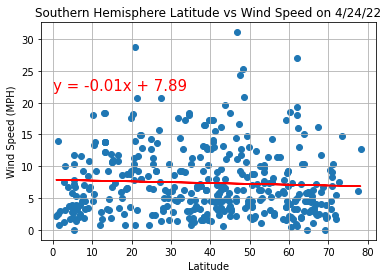

In [24]:
x_values = Northern_DF["Lat"]
y_values = Northern_DF["Wind Speed"]
regEQplotX = 0
regEQplotY = 22
y_label = "Wind Speed (MPH)"
plt.title(f"Southern Hemisphere Latitude vs Wind Speed on 4/24/22")
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)


plt.savefig("./figures/SH_WindSpeed_vs_lat_regress.png", bbox_inches='tight')
plt.show()